# Librerías Matplotlib

- https://matplotlib.org/stable/gallery/index.html


In [17]:
# Cargamos las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de análisis de datos
import numpy as np
import pandas as pd

## Representar las funciones de coseno y seno a la vez

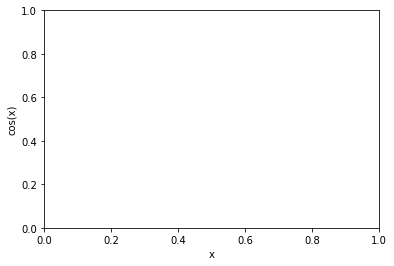

In [24]:
# visualización
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

# añadimos etiquetas y título
plt.xlabel("x")
plt.ylabel("cos(x)")


In [25]:
plt.show()

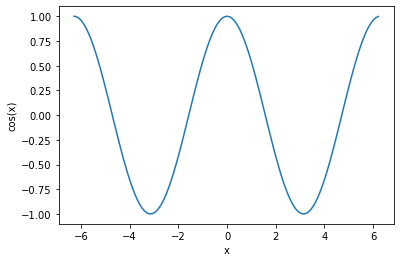

In [21]:
# visualización
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

# añadimos etiquetas y título
plt.xlabel("x")
plt.ylabel("cos(x)")

# Mostramos los resultados
plt.plot(x, np.cos(x))

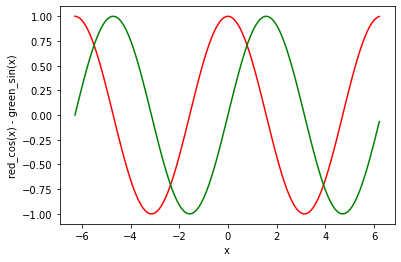

In [26]:
#representación de seno y coseno cambiando el tipo de línea
plt.plot(x, np.cos(x), 'r', x, np.sin(x), 'g')
plt.xlabel("x")
plt.ylabel("red_cos(x) - green_sin(x)")
plt.show()

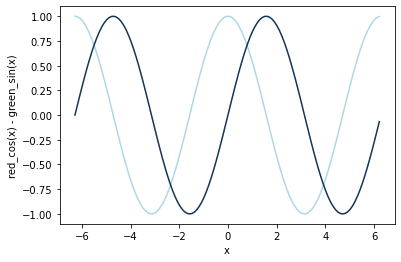

In [34]:
# alternativa
plt.plot(x, np.cos(x), 'lightblue')
plt.plot(x, np.sin(x), '#123456') # admite colores en formato hexadecimal > hexadecimal color online
plt.xlabel("x")
plt.ylabel("red_cos(x) - green_sin(x)")
plt.show()

# Histogramas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


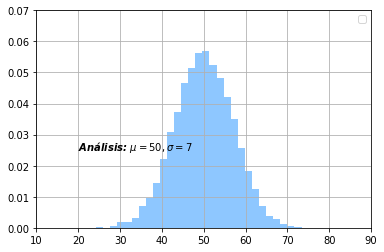

In [48]:
# Parámetros de la función gaussiana
mu, sigma = 50, 7

# generamos un array
x = mu + sigma * np.random.randn(10000)

# la función hist() calcula la frecuencia y el número de barras
n, bins, patches = plt.hist(x, 30, density=1, facecolor='dodgerblue', alpha=0.5)

# Controlamos el tamaño de los ejes (xmin, xmax, ymin, ymax)
plt.text(20, .025, "Análisis: " r'$\mu=50, \sigma=7$', fontstyle='italic', fontweight='bold', animated=True)
plt.axis([10, 90, 0, 0.07])

# Mostramos el grid
plt.grid(True)

# Mostramos el resultado
plt.legend()
plt.show()

In [49]:
n

array([5.90619575e-05, 2.36247830e-04, 5.90619575e-05, 4.72495660e-04,
       1.88998264e-03, 2.00810655e-03, 3.13028375e-03, 7.08743489e-03,
       9.68616102e-03, 1.43520557e-02, 2.22072960e-02, 3.07712798e-02,
       3.72680952e-02, 4.65408225e-02, 5.13839030e-02, 5.61679215e-02,
       5.69947889e-02, 5.25651421e-02, 4.81945573e-02, 4.20521137e-02,
       3.49646788e-02, 2.57510135e-02, 1.82501449e-02, 1.26392589e-02,
       7.08743489e-03, 3.95715115e-03, 2.77591200e-03, 1.12217719e-03,
       6.49681532e-04, 2.95309787e-04])

In [50]:
bins

array([22.58436652, 24.27750377, 25.97064101, 27.66377826, 29.3569155 ,
       31.05005275, 32.74319   , 34.43632724, 36.12946449, 37.82260173,
       39.51573898, 41.20887623, 42.90201347, 44.59515072, 46.28828796,
       47.98142521, 49.67456246, 51.3676997 , 53.06083695, 54.7539742 ,
       56.44711144, 58.14024869, 59.83338593, 61.52652318, 63.21966043,
       64.91279767, 66.60593492, 68.29907216, 69.99220941, 71.68534666,
       73.3784839 ])

In [51]:
patches

<BarContainer object of 30 artists>

## Buscar cristales de proteinas

In [53]:
from scipy import ndimage
import matplotlib.image as mpimg

In [60]:
# Cargamos la imagen Cryoem_groel
im = mpimg.imread("600px-Cryoem_groel.jpg")

In [61]:
im

array([[148, 179,  67, ..., 103,  80,  68],
       [109, 126, 114, ...,  83,  82,  48],
       [131, 104, 132, ..., 127, 117,  63],
       ...,
       [113, 110,  99, ..., 135, 175, 187],
       [116, 121, 124, ..., 159, 118, 129],
       [171,  96, 108, ..., 110,  98, 107]], dtype=uint8)

In [72]:
# aplicamos un filtro gaussiano, con kernel del tipo 3
im_g =ndimage.gaussian_filter(im, 1)

# Aplicamos la normalización a los valores con MinMax scale
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

In [73]:
# Convertimos la imagen resultado para utilizar la función de etiquetado
result = 255 - (im_norm * 255).astype(np.uint8)
result

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

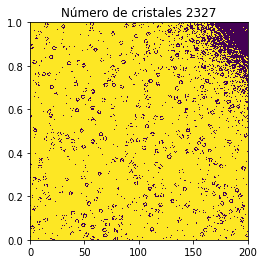

In [74]:
# Indentificamos el número de cristales de proteínas y los mostramos con el valor
plt.title(u"Número de cristales %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation="nearest",
                 extent=[0,200, 0,1], aspect=200)
plt.show()

## Countplot

In [85]:
# Cargamos un dataset
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.shape

(344, 7)

In [86]:
type(penguins)

pandas.core.frame.DataFrame

In [87]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
304,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,Female
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
134,Adelie,Dream,38.1,17.6,187.0,3425.0,Female


In [88]:
# analizar las variables numéricas (discretas o continuas)
penguins.bill_depth_mm.value_counts()

17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: bill_depth_mm, Length: 80, dtype: int64

In [89]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [90]:
penguins.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [91]:
penguins.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [92]:
penguins[['species', 'island', 'sex']].value_counts()

species    island     sex   
Gentoo     Biscoe     Male      61
                      Female    58
Chinstrap  Dream      Female    34
                      Male      34
Adelie     Dream      Male      28
                      Female    27
           Torgersen  Female    24
                      Male      23
           Biscoe     Female    22
                      Male      22
dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

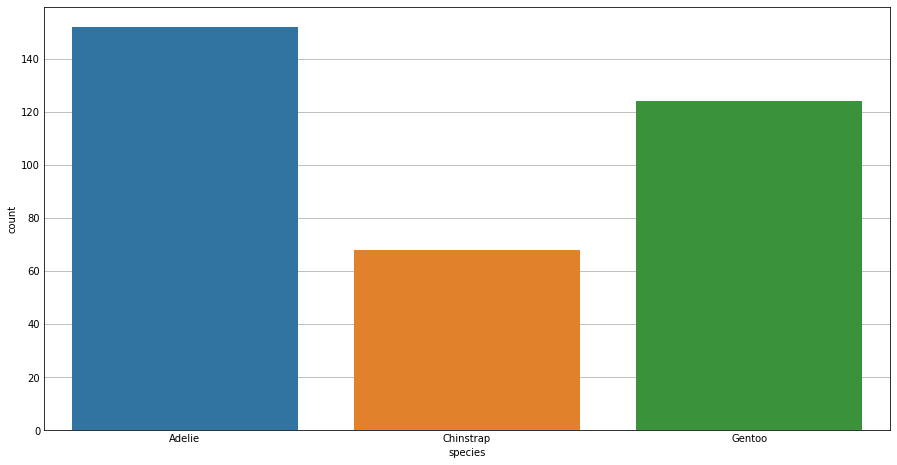

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(x=penguins.species)

`palette` permite configurar la paleta de colores

<AxesSubplot:xlabel='island', ylabel='count'>

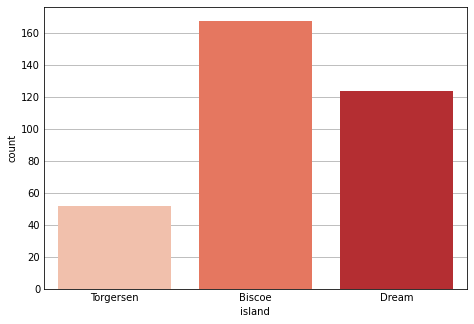

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(x=penguins.island, palette='Reds')

<AxesSubplot:xlabel='count', ylabel='island'>

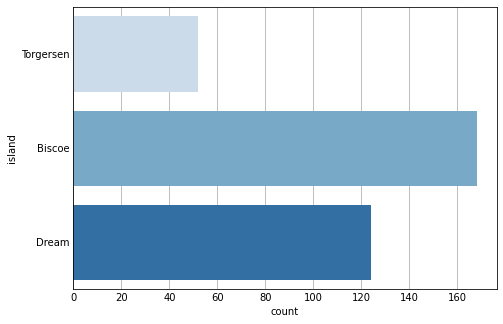

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(y=penguins.island, palette='Blues')

<AxesSubplot:xlabel='count', ylabel='island'>

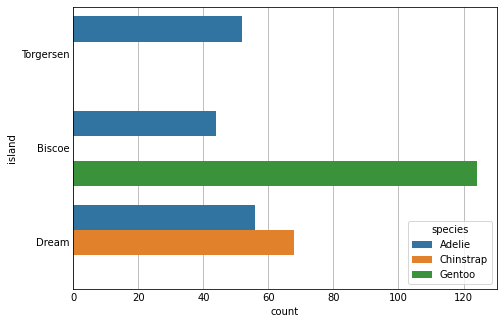

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(y=penguins.island, hue=penguins.species)

<AxesSubplot:xlabel='count', ylabel='island'>

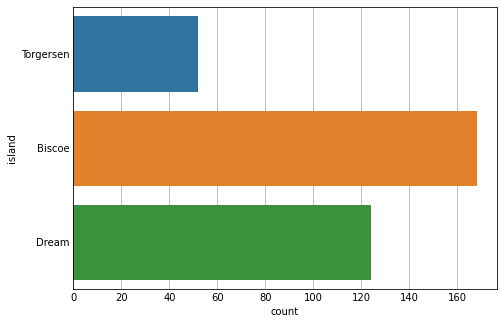

In [121]:
plt.figure(figsize=(6,4))
sns.countplot(y=penguins.island, hue_order=penguins.species.value_counts().index)

<AxesSubplot:xlabel='sex', ylabel='count'>

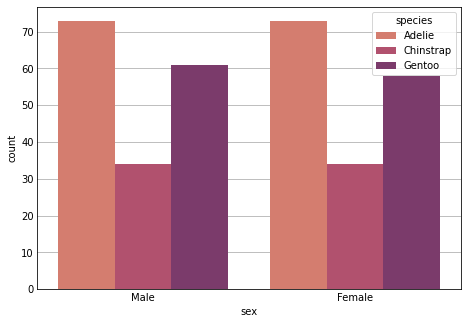

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(x=penguins.sex, hue=penguins.species,
                palette='flare', dodge=True) # True agrupado, False apilado

<AxesSubplot:xlabel='sex', ylabel='count'>

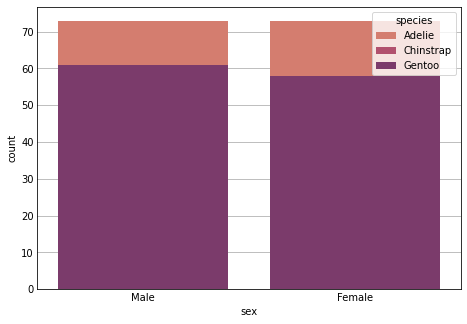

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x=penguins.sex, hue=penguins.species,
                palette='flare', dodge=False) # True agrupado, False apilado

In [7]:
# podemos crear un nuevo atributo InCabin que nos permite conocer si el pasajero estaba en cabina o no
,

`hue` argumento que permite apilar / agrupar las categorías con otra

In [8]:
# Procedemos con la tarea de agrupación


In [9]:
# representación en barra de la age y survived


### Agrupaciones con pd.qcut() y pd.cut()

In [10]:
# Creamos una agrupación en n grupos con pd.qcut()


In [11]:
# creamos una agrupación en n grupos con pd.cut()


In [12]:
# también un extremo


## Histplot

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

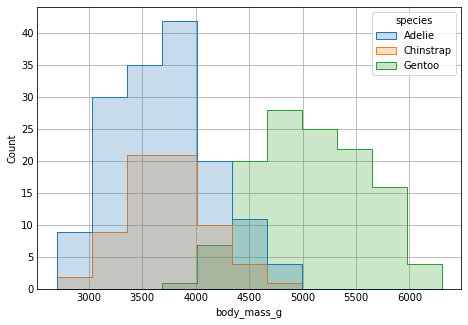

In [123]:
# Para poder representar gráficamente un histograma bins=default
plt.figure(figsize=(6,4))
sns.histplot(x=penguins.body_mass_g, hue=penguins.species, element='step')

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

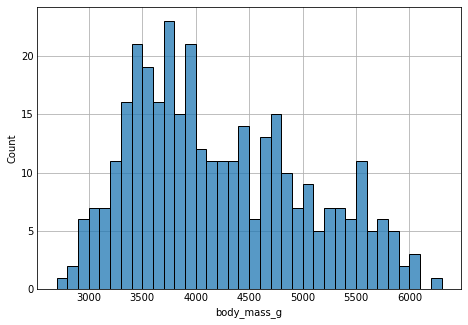

In [138]:
plt.figure(figsize=(6,4))
sns.histplot(x=penguins.body_mass_g,  binwidth=100)

## Kdeplot

muy útil para una variable numèrica, es similar al histograma pero sin mostrar las barras.

## Scatterplot

muy útil para 2 variables numéricas

In [139]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

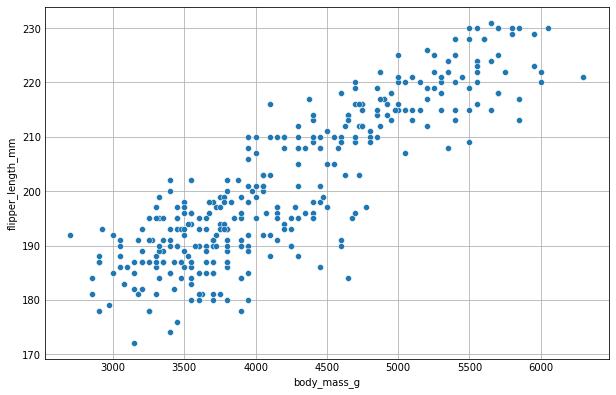

In [142]:
# mostrar visualmente gráfico de dispersión
plt.figure(figsize=(8,5))
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

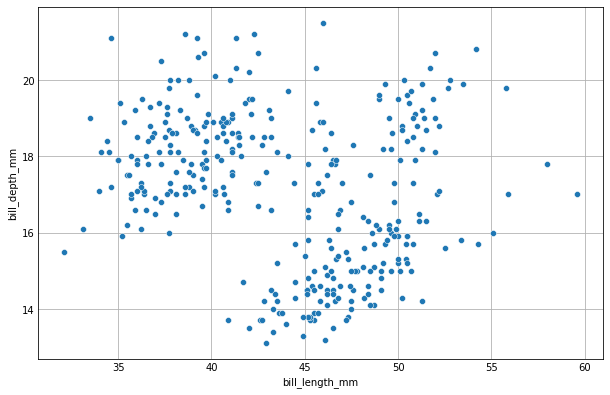

In [144]:
# Mostramos gráficamente el gráfico de dispersión
plt.figure(figsize=(8,5))
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins)

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

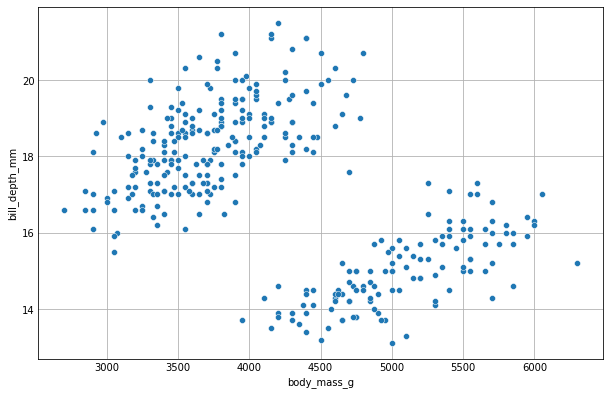

In [145]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="body_mass_g", y="bill_depth_mm", data=penguins)

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

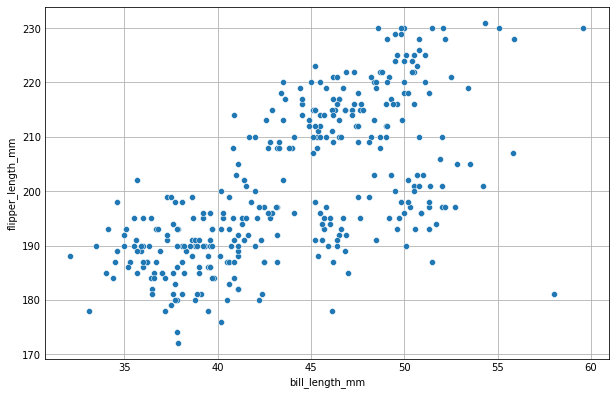

In [146]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins)

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

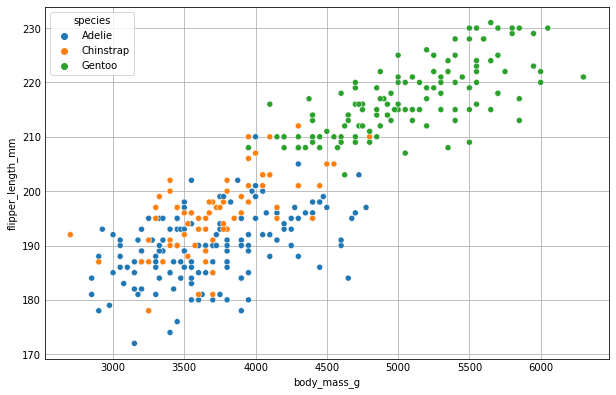

In [147]:
# aplicando a este último el parámetro hue, podemos observar los segmentos por especie
plt.figure(figsize=(8,5))
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species", data=penguins)

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

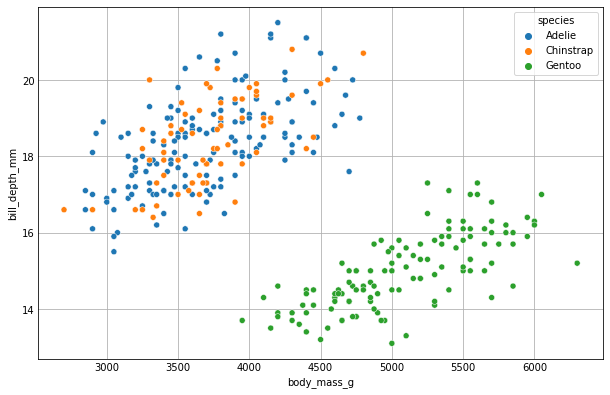

In [148]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="body_mass_g", y="bill_depth_mm", hue="species", data=penguins)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

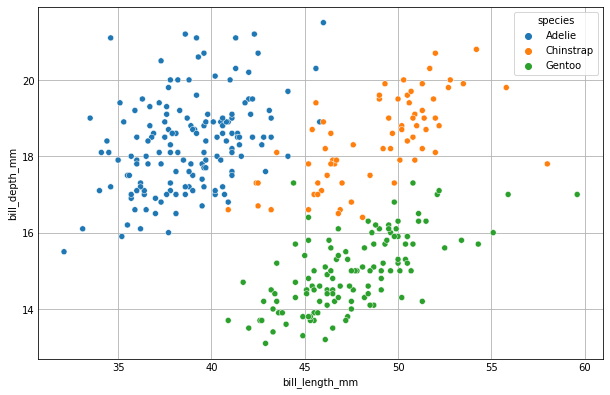

In [149]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

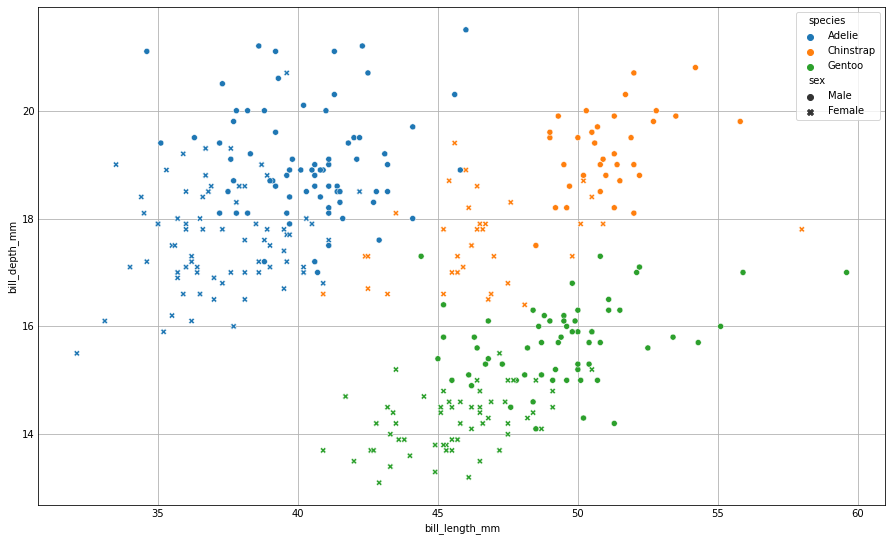

In [150]:
# Utilizamos el style para marcar las zonas
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=[12,8])
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex", data=penguins)

## Jointplot

útil para 2 variables numèricas

## Pairplot

muy útil cuando necesitamos comparar diferentes variables

## Boxplot

útil para variables numéricas.
Representación de los valores máximo y mínimo (100% y el 0%), además de la mediana, 50%, 75%, 25%

## Pie Chart

## Facet Grid